# Classes

## An introduction

### Why do we need them?

We'll use a common modelling task as an example to show why classes are useful.  

You have some model that requires imagery and meteorological data as inputs. The data requires processing before it can be used by the model. At first you're content with one combination of data and parameters so you don't bother with functions.

In [1]:
# general parameters
time_start = ___ 
time_end = ___ 
geographic_extent = ___ 
folder_output  = ___

# imagery parameters
folder_images = ___ 
resolution = ___ 
bands = ___ 

# meteorology parameters
folder_met = ___ 
met_columns = ___

# model parameters
grid_type = ___

How most scripts start out:

In [2]:
# load images
# code

# process images
# code

# load met
# code

# run model
# code

But what if you want to compare several datasets?

At this point you'd take your code and throw it in a function, like so:

In [ ]:
def run_pipeline(
    time_start, time_end, geographic_extent, # general parameters
    folder_images, resolution, bands, # imagery parameters
    folder_met, met_columns, # meteorology parameters
    grid_type): # model parameters
    
    # load images
    # code

    # process images
    # code

    # load met
    # code

    # run model
    # code
    return result

# dataset 1
result1 = run_pipeline(
    time_start, time_end, geographic_extent,
    folder_images1, resolution, bands,
    folder_met1, met_columns,
    grid_type)

# dataset 2
result2 = run_pipeline(
    time_start, time_end, geographic_extent,
    folder_images2, resolution, bands,
    folder_met2, met_columns,
    grid_type)

But what if you want to compare several grid types without reloading all the data?

Now you'd consider breaking up your function into smaller functions so you can avoid repeating parts unnecessarily:

In [ ]:
def load_images(folder_images, time_start, time_end, geographic_extent):
    # code
    return images

def process_images(images, resolution, bands):
    # code
    return images

def load_met(folder_met, time_start, time_end, geographic_extent, met_columns):
    # code
    return met

def run_model(images, met, time_start, time_end, geographic_extent, grid_type):
    # code
    return result

# load and process data
images = load_images(folder_images, time_start, time_end, geographic_extent)
images = process_images(images, resolution, bands)
met = load_met(folder_met, time_start, time_end, geographic_extent, met_columns)

# grid type 1
result1 = run_model(images, met, time_start, time_end, geographic_extent, grid_type1)

# grid type 2
result2 = run_model(images, met, time_start, time_end, geographic_extent, grid_type2)

As you can see, it starts getting messy to pass variables between many small functions. This can get out of hand quickly when you have several permutations of every parameter. It becomes increasingly difficult to keep track of all your data, parameters and results. The solution in this case is to use classes. 

Classes are like "blueprints" for a set of functions and variables. They are useful when you need to work with variations on a set of operations. Here's how a class might look and be used for the problems we faced:

In [ ]:
class Pipeline:
    def __init__(self, time_start, time_end, geographic_extent):
        # code
            
    def load_images(self, folder_images):
        # code
        
    def process_images(self, resolution, bands):
        # code
        
    def load_met(self, folder_met):
        # code
        
    def run_model(self, grid_type):
        # code

# run pipeline with grid type 1
pipeline1 = Pipeline(time_start, time_end, geographic_extent)
pipeline1.load_images(folder_images)
pipeline1.process_images(resolution, bands)
pipeline1.load_met(folder_met)
pipeline1.run_model(grid_type1)
print(pipeline1.result)

# try with grid type 2, but don't reload data
pipeline2 = Pipeline(time_start, time_end, geographic_extent)
pipeline2.images = pipeline1.images
pipeline2.met = pipeline1.met
pipeline2.run_model(grid_type2)
print(pipeline2.result)

# add a note to pipeline1
pipeline1.note = 'this was an interesting model run'

# see a single attribute of a pipeline
print(pipeline1.grid_type)

`'grid_type1'`

In [ ]:
# see all attributes of a pipeline
print(vars(pipeline1))

```{'time_start': ___, 
 'time_end': ___, 
 'geographic_extent': ___, 
 'folder_images': ___, 
 'resolution': ___, 
 'bands': ___, 
 'folder_met': ___, 
 'grid_type': 'grid_type1',
 'note': 'this was an interesting model run'}```

Another useful feature of using classes is that you can pass your class instances (e.g. a pipeline) around as a package. 

The advantage of doing this is they then bring with them all of their attributes, so you don't need to think about it.

In [ ]:
def merge_pipelines(pipelines):
    # code
    return pipelines_merged

# "merge" two pipelines
pipelines_merged = merge_pipelines([pipeline1, pipeline2])

Classes also make it very easy to save and load your data as a package including attributes.

In [ ]:
import pickle

# save your entire pipeline, data and all
pickle.dump(pipeline, open("pipeline.pickle", "wb"))
    
# save your pipeline without data
del pipeline.images
del pipeline.met
pickle.dump(pipeline, open("pipeline_nodata.pickle", "wb"))
    
# load your pipeline
pipeline = pickle.load(open("pipeline.pickle", "rb"))

### You're already using classes!

Most common packages you're familiar with make liberal use of classes. You've been using them for years without realising.

For example, pandas' `DataFrame` is a class that has associated functions, such as `describe`.

In [25]:
import pandas as pd

# load and descibe the classic 'iris' dataset
df =  pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Another nice thing about classes is we can see which functions they contain. 

We know these functions are specifically designed to work with the data the class holds.

In [ ]:
# list all functions within the pd.DataFrame class
[func for func in dir(pd.DataFrame) if callable(getattr(pd.DataFrame, func))]

Remember, you can always pull up the documentation of any of these functions that take your interest.

You can do this by prepending a function with `?` or by pressing `shift + tab` with your cursor anywhere in the name. 

In [ ]:
?pd.DataFrame.sum

You can treat a dataframe the same way you would any other class instance.

In [16]:
df.note = 'I love dataframes'
vars(df)

{'_is_copy': None,
 '_mgr': BlockManager
 Items: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
        'species'],
       dtype='object')
 Axis 1: RangeIndex(start=0, stop=150, step=1)
 FloatBlock: slice(0, 4, 1), 4 x 150, dtype: float64
 ObjectBlock: slice(4, 5, 1), 1 x 150, dtype: object,
 '_item_cache': {},
 '_attrs': {},
 'note': 'I love dataframes'}

This is getting a bit more advanced, but you can even go further and extend classes with more functions:

In [148]:
class MagicDataFrame(pd.DataFrame):
    def __init__(self, data):
        super().__init__(data)
        
    def magic(self):
        print(f"You're a wizard, {self.wizards[0]}")

In [149]:
df_magic = MagicDataFrame({'wizards':['Harry']})
df_magic

,wizards
0,Harry


In [150]:
df_magic.magic()

You're a wizard, Harry


![harry](https://i.ytimg.com/vi/vUN7yu7zvz8/hqdefault.jpg)

## How to use classes

This is a copy of the code on: https://www.w3schools.com/python/python_classes.asp

Python is an object oriented programming language. Almost everything in Python is an object, with its properties and methods. A Class is like an object constructor, or a "blueprint" for creating objects.

### Create a class

To create a class, use the keyword `class`

In [1]:
class MyClass:
    x = 5

### Create an object

Now we can use the class named `MyClass` to create objects:

In [2]:
p1 = MyClass()
print(p1.x) 

5


### The `__init__()` function

The examples above are classes and objects in their simplest form, and are not really useful in real life applications. To understand the meaning of classes we have to understand the built-in `__init__()` function. All classes have a function called `__init__()`, which is always executed when the class is being initiated. Use the `__init__()` function to assign values to object properties, or other operations that are necessary to do when the object is being created:

In [32]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

p1 = Person("John", 36)

print(p1.name)
print(p1.age) 

John
36


In [34]:
vars(p1)

{'name': 'John', 'age': 36}

### Object methods

Objects can also contain methods. Methods in objects are functions that belong to the object. Let us create a method in the Person class:

In [5]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
        
    def myfunc(self):
        print("Hello my name is " + self.name)

p1 = Person("John", 36)
p1.myfunc() 

Hello my name is John


### The `self` parameter

The self parameter is a reference to the current instance of the class, and is used to access variables that belongs to the class. It does not have to be named "self", you can call it whatever you like, but it has to be the first parameter of any function in the class:

In [6]:
class Person:
    def __init__(mysillyobject, name, age):
        mysillyobject.name = name
        mysillyobject.age = age
        
        
    def myfunc(abc):
        print("Hello my name is " + abc.name)

p1 = Person("John", 36)
p1.myfunc() 

Hello my name is John


### Modify object properties

You can modify properties on objects like this:

In [7]:
p1.age = 40

### Append object properties

You can append properties to objects like this:

In [10]:
p1.height = 180

### Delete object properties

You can delete properties on objects by using the `del` keyword:

In [9]:
del p1.age 

## Python inheritance

Inheritance allows us to define a class that inherits all the methods and properties from another class. Parent class is the class being inherited from, also called base class. Child class is the class that inherits from another class, also called derived class.

### Create a parent class

Any class can be a parent class, so the syntax is the same as creating any other class:

In [18]:
class Person:
    def __init__(self, fname, lname):
        self.firstname = fname
        self.lastname = lname
        
    def printname(self):
        print(self.firstname, self.lastname)

# Use the Person class to create an object, and then execute the printname method:

x = Person("John", "Doe")
x.printname() 

John Doe


### Create a child class

To create a class that inherits the functionality from another class, send the parent class as a parameter when creating the child class:

In [19]:
class Student(Person):
    pass 

Now the Student class has the same properties and methods as the Person class.

In [20]:
x = Student("Mike", "Olsen")
x.printname() 

Mike Olsen


### Add the `__init__()` function

So far we have created a child class that inherits the properties and methods from its parent. We want to add the `__init__()` function to the child class (instead of the pass keyword).

In [ ]:
class Student(Person):
    def __init__(self, fname, lname):
    # add properties etc. 

When you add the `__init__()` function, the child class will no longer inherit the parent's `__init__()` function.

Note: The child's `__init__()` function overrides the inheritance of the parent's `__init__()` function.

To keep the inheritance of the parent's `__init__()` function, add a call to the parent's `__init__()` function:

In [21]:
class Student(Person):
    def __init__(self, fname, lname):
        Person.__init__(self, fname, lname) 

Now we have successfully added the `__init__()` function, and kept the inheritance of the parent class, and we are ready to add functionality in the `__init__()` function.

### Use the `super()` function

Python also has a `super()` function that will make the child class inherit all the methods and properties from its parent:

In [22]:
class Student(Person):
    def __init__(self, fname, lname):
        super().__init__(fname, lname) 

By using the `super()` function, you do not have to use the name of the parent element, it will automatically inherit the methods and properties from its parent.

### Add properties

We can extend the `Person` class with a `year` property. To do this we add another parameter in the `__init__()` function:

In [28]:
class Student(Person):
    def __init__(self, fname, lname, year):
        super().__init__(fname, lname)
        self.graduationyear = year

x = Student("Mike", "Olsen", 2019) 
print(x.graduationyear)

2019


### Add methods

We can go a step further and extend the `Person` class with more methods, as below:

In [24]:
class Student(Person):
    def __init__(self, fname, lname, year):
        super().__init__(fname, lname)
        self.graduationyear = year

    def welcome(self):
        print("Welcome", self.firstname, self.lastname, "to the class of", self.graduationyear) 
        
x = Student("Mike", "Olsen", 2019) 
x.welcome()

Welcome Mike Olsen to the class of 2019


## An exercise

### Create your own class

1. Rewrite the pipeline code below into a class
2. Initialise two class instances using the parameters given
3. Run the class method(s) of each instance to display two processed images
4. Create a function to combine the two processed images into a 2-channel image (don't forget the 2-channel nodata mask).

The old way of doing things:

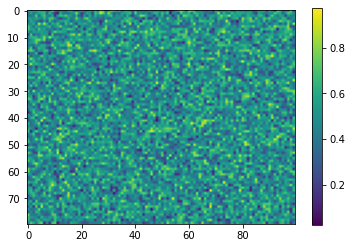

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# parameters 1
dims1 = (100, 80, 3)
chan_dim1 = 2
bit_depth1 = 14
nodata_value1 = -1

# parameters 2
dims2 = (1, 100, 80)
chan_dim2 = 0
bit_depth2 = 8
nodata_value2 = -9999

## pipeline 1
# create image
img = np.random.randint(low=0, high=2**bit_depth1, size=dims1)
# rearrange image array for consistent channel ordering
img = np.swapaxes(img, axis1=chan_dim1, axis2=0)
# create mask for nodata values
nodata = img == nodata_value
# convert brightness values to 0-1 range
img = img.astype(float) / 2**bit_depth1
# convert to panchromatic image if not already
img = np.mean(img, axis=0)
# plot image
plt.imshow(img); plt.colorbar(); plt.show()

## pipeline 2
# ...

The classy way of doing things:

In [3]:
### your code here!

### Practise inheritance

Now that you've got the hang of creating your own classes, here's a final exercise to build on previously defined classes:

1. Create a new class that inherits from the one you wrote above.
2. Create a class method that clips the processed image to a maximum of `clip_value3`.
2. Initialise this new class with the 3rd set of parameters below.
3. Display the processed, clipped image.

In [12]:
# parameters 3
dims3 = (100, 80, 3)
chan_dim3 = 2
bit_depth3 = 12
nodata_value3 = -100
clip_value3 = 0.8

In [13]:
### your code here!